# Classifying Newswires:
## Multiclass classification example
### Deep Learning with Keras pg. 78
#### Reuters Dataset

In [17]:
# Step 01: Prepare the Dataset
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels)= reuters.load_data(num_words= 10000)
print('Length of train data:', len(train_data))
print('length of test data:', len(test_data))
word_index= reuters.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire= ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Encoding the Data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1.
    return results

x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results= np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_labels= to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels= to_categorical(test_labels)

Length of train data: 8982
length of test data: 2246


In [19]:
# Step 02: Building the Network
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation= 'relu', input_shape= (10000,)))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Step 03: Validation of the model

x_val= x_train[:1000]
partial_x_train= x_train[1000:]

y_val= one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

# Training the model
history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data= (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.6329 - accuracy: 0.5496 - val_loss: 1.7561 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.4432 - accuracy: 0.7007 - val_loss: 1.3330 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0813 - accuracy: 0.7762 - val_loss: 1.1694 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8570 - accuracy: 0.8235 - val_loss: 1.0527 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6881 - accuracy: 0.8561 - val_loss: 0.9851 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5523 - accuracy: 0.8847 - val_loss: 0.9813 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4452 - accuracy: 0.9058 - val_loss: 0.9214 - val_accuracy: 0.8120
Epoch 8/20
16

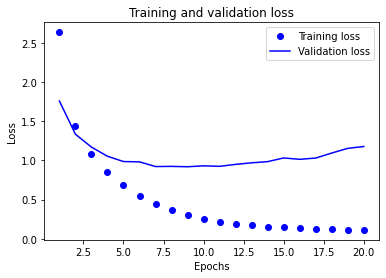

In [22]:
# Step 04: Plotting 
import matplotlib.pyplot as plt

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

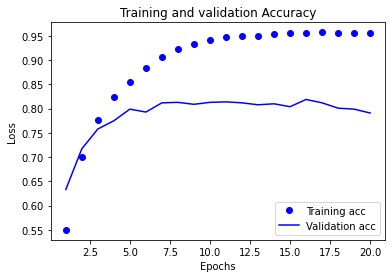

0.19367764915405164

In [28]:
plt.clf()

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [29]:
# Step 05: Retraining the model from scratch

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data= (x_val, y_val))
results= model.evaluate(x_test, one_hot_test_labels)
print(results)

import copy
test_labels_copy= copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array= np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.6166 - accuracy: 0.4630 - val_loss: 1.7490 - val_accuracy: 0.6330
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.4257 - accuracy: 0.7002 - val_loss: 1.3157 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.0560 - accuracy: 0.7727 - val_loss: 1.1411 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8334 - accuracy: 0.8198 - val_loss: 1.0367 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6673 - accuracy: 0.8574 - val_loss: 0.9684 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5316 - accuracy: 0.8880 - val_loss: 0.9204 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4315 - accuracy: 0.9098 - val_loss: 0.8801 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

0.188780053428317

In [41]:
# Step 06: Generating predictions on new data
predictions= model.predict(x_test)
print('Size of prediction: ',predictions[0].shape)
print('Sum of first line of predictions: ', np.sum(predictions[0]))
print('The largest entrty in the predicted class: ',np.argmax(predictions[0]))

# A model w/ info bottleneck
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))
res= model.evaluate(partial_x_train, partial_y_train)
print(res)

Size of prediction:  (46,)
Sum of first line of predictions:  0.9999999
The largest entrty in the predicted class:  35
Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 3.0439 - accuracy: 0.3553 - val_loss: 2.5891 - val_accuracy: 0.3950
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 2.3904 - accuracy: 0.3969 - val_loss: 2.3400 - val_accuracy: 0.3970
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0609 - accuracy: 0.4173 - val_loss: 1.9985 - val_accuracy: 0.4220
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.7007 - accuracy: 0.4476 - val_loss: 1.6780 - val_accuracy: 0.4570
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3814 - accuracy: 0.6258 - val_loss: 1.5010 - val_accuracy: 0.6260
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 1.2032 - accuracy: 0.6641 - val_loss: 1.4316 - val_accuracy: 0.6530
Epoch 7/20
63/63 [=================